### Using KMeans in sklearn

In [1]:
import pandas as pd

df = pd.read_csv("historical-weather.csv")
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowID               15873 non-null  int64  
 1   hpwren_timestamp    15873 non-null  object 
 2   air_pressure        15873 non-null  float64
 3   air_temp            15873 non-null  float64
 4   avg_wind_direction  15870 non-null  float64
 5   avg_wind_speed      15870 non-null  float64
 6   max_wind_direction  15870 non-null  float64
 7   max_wind_speed      15870 non-null  float64
 8   min_wind_direction  15870 non-null  float64
 9   min_wind_speed      15870 non-null  float64
 10  rain_accumulation   15872 non-null  float64
 11  rain_duration       15872 non-null  float64
 12  relative_humidity   15873 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.6+ MB


In [3]:
#df = df.iloc[:,[0]]
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [4]:
df = df.loc[:,['relative_humidity', 'air_temp']]
df

,relative_humidity,air_temp
0,60.5,64.76
1,63.9,62.96
2,33.4,68.00
3,58.2,64.22
4,89.8,52.70
...,...,...
15868,43.2,77.18
15869,42.8,77.00
15870,43.9,75.92
15871,46.7,75.38


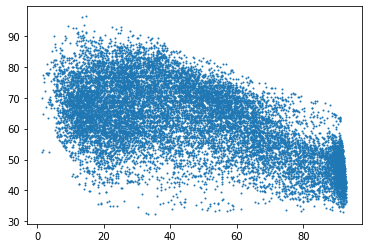

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df["relative_humidity"], df["air_temp"],s=1)
plt.show()

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,max_iter=100)
kmeans.fit(df)

KMeans(max_iter=100, n_clusters=4)

In [7]:
kmeans.labels_

array([3, 3, 0, ..., 0, 0, 0])

In [8]:
kmeans.cluster_centers_

array([[37.8651441 , 71.7580261 ],
       [86.29493781, 47.5526873 ],
       [18.38750515, 66.06505567],
       [58.84128086, 59.95069444]])

In [9]:
df.loc[0,["relative_humidity"]]

relative_humidity    60.5
Name: 0, dtype: float64

In [10]:
df1_x = []
df2_x = []
df3_x = []
df4_x = []
df1_y = []
df2_y = []
df3_y = []
df4_y = []

count = 0
for cluster_type in kmeans.labels_:
    #print("count = %d, cluster_type = %d" % (count, cluster_type))
    if cluster_type == 0:
        df1_x.append(df.loc[count, ["relative_humidity"]])
        df1_y.append(df.loc[count,["air_temp"]])
    if cluster_type == 1:
        df2_x.append(df.loc[count, ["relative_humidity"]])
        df2_y.append(df.loc[count,["air_temp"]])
    if cluster_type == 2:
        df3_x.append(df.loc[count, ["relative_humidity"]])
        df3_y.append(df.loc[count,["air_temp"]])
    if cluster_type == 3:
        df4_x.append(df.loc[count, ["relative_humidity"]])
        df4_y.append(df.loc[count,["air_temp"]])
    count += 1

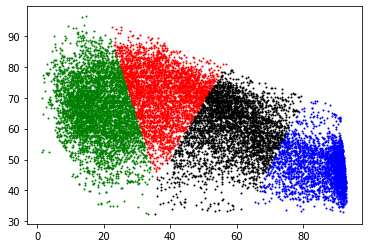

In [11]:
plt.scatter(df1_x, df1_y, c = 'red', s=1)
plt.scatter(df2_x, df2_y, c = 'blue', s=1)
plt.scatter(df3_x, df3_y, c = 'green', s=1)
plt.scatter(df4_x, df4_y, c = 'black', s=1)
plt.show()

### Using my version of Kmeans

In [14]:
from cluster import KMeans

kmeans = KMeans(k=4)
kmeans.fit_historical_weather(99)

k = 4, max_iter = 100 

x_min = 32.360000, x_max = 96.440000, y_min = 1.500000, y_max = 92.900000 

centers:  [[89, 51, 56, 47], [61, 22, 68, 10]]
iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
iter:  10
iter:  11
iter:  12
iter:  13
iter:  14
iter:  15
iter:  16
iter:  17
iter:  18
iter:  19
iter:  20
iter:  21
iter:  22
iter:  23
iter:  24
iter:  25
iter:  26
iter:  27
iter:  28
iter:  29
iter:  30
iter:  31
iter:  32
iter:  33
iter:  34
iter:  35
iter:  36
iter:  37
iter:  38
iter:  39
iter:  40
iter:  41
iter:  42
iter:  43
iter:  44
iter:  45
iter:  46
iter:  47
iter:  48
iter:  49
iter:  50
iter:  51
iter:  52
iter:  53
iter:  54
iter:  55
iter:  56
iter:  57
iter:  58
iter:  59
iter:  60
iter:  61
iter:  62
iter:  63
iter:  64
iter:  65
iter:  66
iter:  67
iter:  68
iter:  69
iter:  70
iter:  71
iter:  72
iter:  73
iter:  74
iter:  75
iter:  76
iter:  77
iter:  78
iter:  79
iter:  80
iter:  81
iter:  82
iter:  83
iter:  84
iter:  85
ite

In [15]:
kmeans.labels_

[0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [16]:
kmeans.cluster_centers_

[[59.99724243977429, 58.82537160430551],
 [71.7515455531453, 37.747288503253664],
 [47.54739583333329, 86.29733796296304],
 [66.03827221876945, 18.345079759685134]]

In [17]:
df1_x = []
df2_x = []
df3_x = []
df4_x = []
df1_y = []
df2_y = []
df3_y = []
df4_y = []

count = 0
for cluster_type in kmeans.labels_:
    #print("count = %d, cluster_type = %d" % (count, cluster_type))
    if cluster_type == 0:
        df1_x.append(df.loc[count, ["relative_humidity"]])
        df1_y.append(df.loc[count,["air_temp"]])
    if cluster_type == 1:
        df2_x.append(df.loc[count, ["relative_humidity"]])
        df2_y.append(df.loc[count,["air_temp"]])
    if cluster_type == 2:
        df3_x.append(df.loc[count, ["relative_humidity"]])
        df3_y.append(df.loc[count,["air_temp"]])
    if cluster_type == 3:
        df4_x.append(df.loc[count, ["relative_humidity"]])
        df4_y.append(df.loc[count,["air_temp"]])
    count += 1

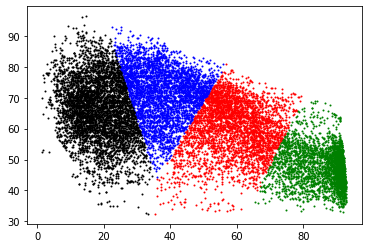

In [18]:
plt.scatter(df1_x, df1_y, c = 'red', s=1)
plt.scatter(df2_x, df2_y, c = 'blue', s=1)
plt.scatter(df3_x, df3_y, c = 'green', s=1)
plt.scatter(df4_x, df4_y, c = 'black', s=1)
plt.show()

### difference bettwen the result of the two implementations

The results of the two implementations are similar.
KMeans in sklearn returns result very fast. However, KMeans in my version runs 19 minutes to get the result. 
My version may need a lot of improvements to improve the running time.